In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
sns.set_theme("paper", rc={"figure.figsize": (16, 4)})

In [3]:
df = pd.read_csv('../data/sp500/csv/AAPL.csv', parse_dates=['Date'], date_format='%d-%m-%Y', index_col=0)
df['RateOfReturn'] = (df['Close'] - df['Close'].shift(1))/df['Close'].shift(1)
df

,Low,Open,Volume,High,Close,Adjusted Close,RateOfReturn
Date,,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,NaN
1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,-0.052171
1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,-0.073398
1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,0.024751
1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,0.028992
...,...,...,...,...,...,...,...
2022-12-06,141.919998,147.070007,64727200,147.300003,142.910004,142.910004,-0.025370
2022-12-07,140.000000,142.190002,69721100,143.369995,140.940002,140.940002,-0.013785
2022-12-08,141.100006,142.360001,62128300,143.520004,142.649994,142.649994,0.012133


0.9997533089272921

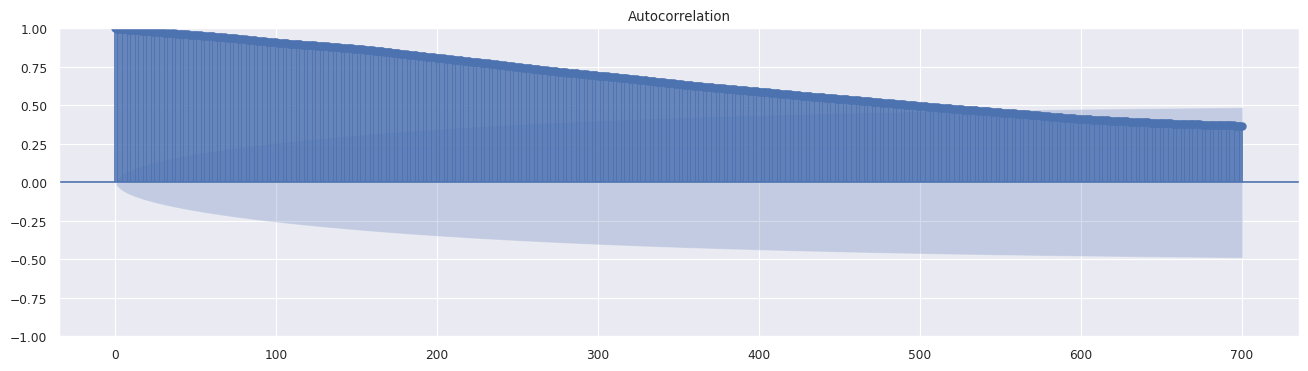

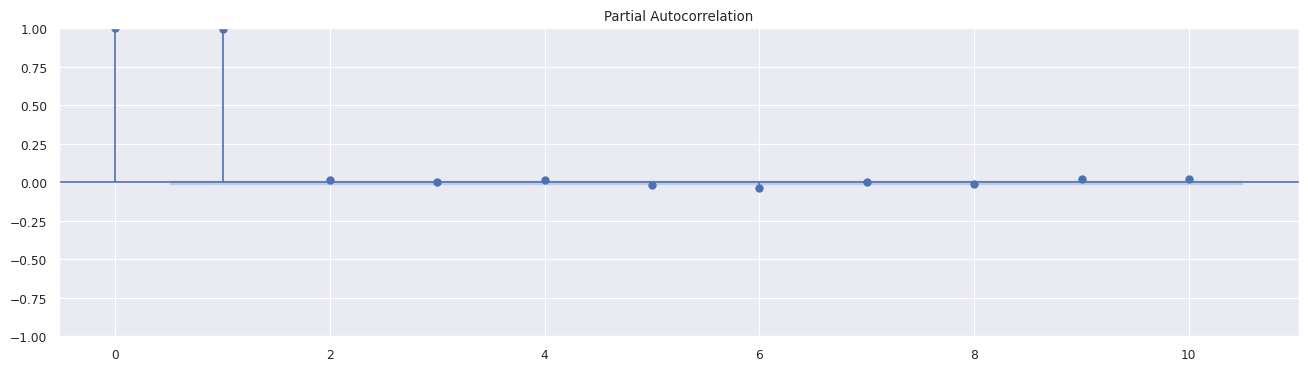

In [4]:
sm.graphics.tsa.plot_acf(df['Close'].values, lags=700)
sm.graphics.tsa.plot_pacf(df['Close'].values, lags=10)
df['Close'].autocorr()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

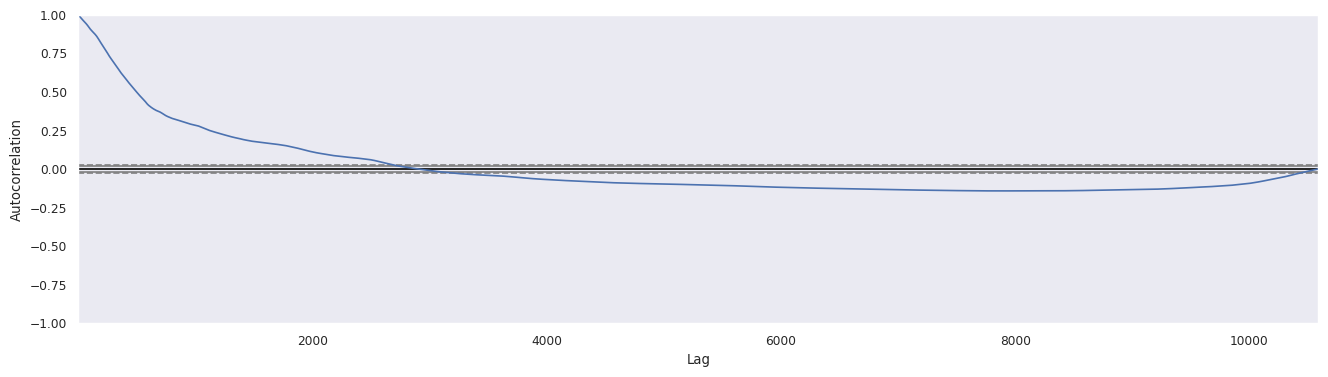

In [5]:
pd.plotting.autocorrelation_plot(df['Close'])

In [6]:
# import yfinance as yf
# df_test = yf.download("AAPL", start="2020-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [15]:
df = df.resample('B').mean()
df

,Low,Open,Volume,High,Close,Adjusted Close,RateOfReturn
Date,,,,,,,
1980-12-12,0.128348,0.128348,469033600.0,0.128906,0.128348,0.099874,NaN
1980-12-15,0.121652,0.122210,175884800.0,0.122210,0.121652,0.094663,-0.052171
1980-12-16,0.112723,0.113281,105728000.0,0.113281,0.112723,0.087715,-0.073398
1980-12-17,0.115513,0.115513,86441600.0,0.116071,0.115513,0.089886,0.024751
1980-12-18,0.118862,0.118862,73449600.0,0.119420,0.118862,0.092492,0.028992
...,...,...,...,...,...,...,...
2022-12-06,141.919998,147.070007,64727200.0,147.300003,142.910004,142.910004,-0.025370
2022-12-07,140.000000,142.190002,69721100.0,143.369995,140.940002,140.940002,-0.013785
2022-12-08,141.100006,142.360001,62128300.0,143.520004,142.649994,142.649994,0.012133


In [16]:
df_w = df.resample('W').mean()
df_w

,Low,Open,Volume,High,Close,Adjusted Close,RateOfReturn
Date,,,,,,,
1980-12-14,0.128348,0.128348,469033600.0,0.128906,0.128348,0.099874,NaN
1980-12-21,0.118973,0.119196,98026880.0,0.119531,0.118973,0.092579,-0.002159
1980-12-28,0.143415,0.143415,46972800.0,0.143973,0.143415,0.111598,0.058951
1981-01-04,0.155971,0.156250,54863200.0,0.156669,0.155971,0.121369,-0.006925
1981-01-11,0.141964,0.142411,39580800.0,0.142522,0.141964,0.110469,-0.015069
...,...,...,...,...,...,...,...
2022-11-20,147.879996,149.812000,76535940.0,151.583997,149.823996,149.823996,0.002161
2022-11-27,147.777496,149.012501,51006375.0,150.375000,149.342499,149.342499,-0.005172
2022-12-04,143.308002,145.000000,80181200.0,147.460001,145.907999,145.907999,-0.000060


0.9993308969220516

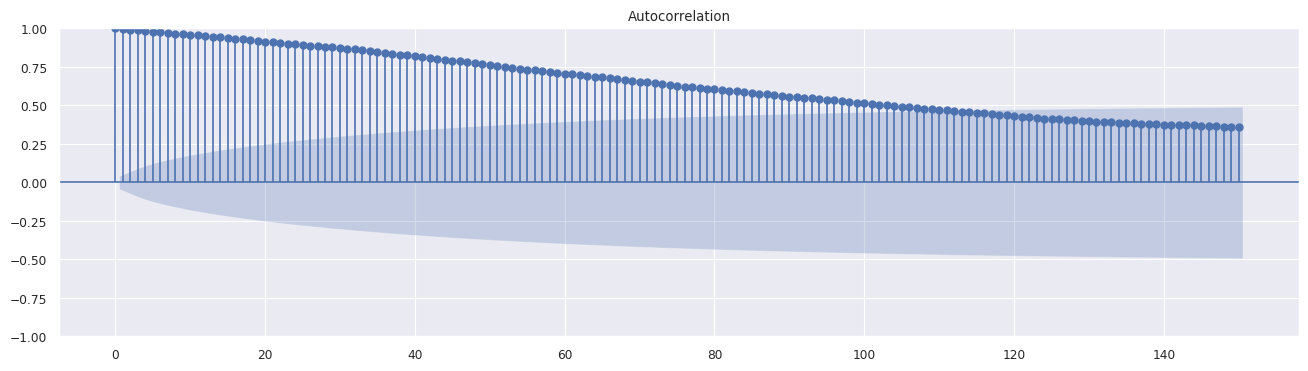

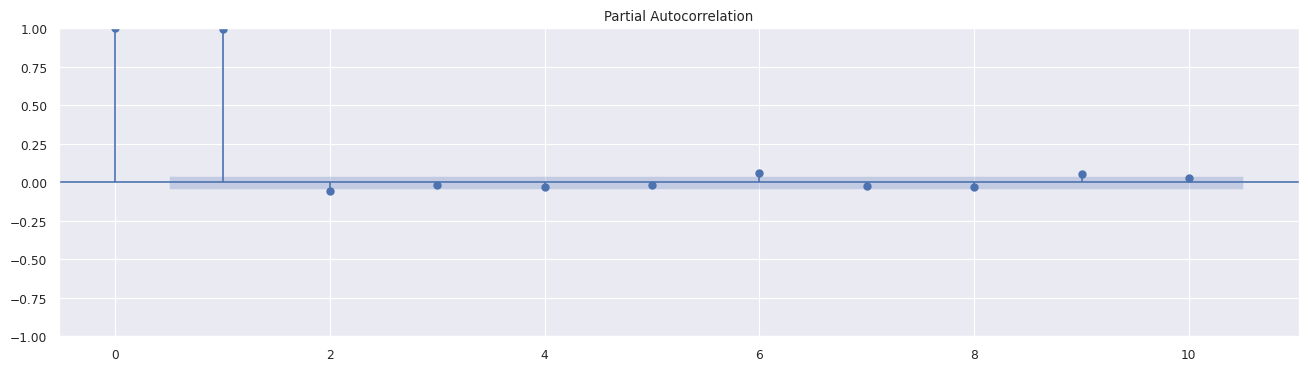

In [17]:
sm.graphics.tsa.plot_acf(df_w['Close'].values, lags=150)
sm.graphics.tsa.plot_pacf(df_w['Close'].values, lags=10)
df_w['Close'].autocorr()

In [18]:
# model = sm.tsa.ARIMA(df_w['Close'], order=(10,1,1), freq='W')
model = sm.tsa.ARIMA(df['Close'], order=(50,1,1))

In [19]:
res = model.fit(low_memory=True)

In [20]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                10957
Model:                ARIMA(50, 1, 1)   Log Likelihood              -11897.537
Date:                Tue, 08 Oct 2024   AIC                          23899.074
Time:                        22:27:51   BIC                          24278.759
Sample:                    12-12-1980   HQIC                         24027.014
                         - 12-12-2022                                         
Covariance Type:               approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4345      0.082     -5.326      0.000      -0.594      -0.275
ar.L2         -0.0564      0.011     -4.956      0.000      -0.079      -0.034
ar.L3         -0.0282      0.011     -2.529      0.011      -0.050      -0.006
ar.L4          0.0225      0.011      2.087      0.037       0.001       0.044
ar.L5          0.0461      0.011      4.229      0.000       0.025       0.068
ar.L6          0.0080      0.011      0.722      0.470      -0.014       0.030
ar.L7          0.0072      0.011      0.676      0.499      -0.014       0.028
ar.L8         -0.0848      0.011     -7.905      0.000      -0.106      -0.064
ar.L9          0.0526      0.012      4.304      0.000       0.029       0.077
ar.L10        -0.0416      0.013     -3.224      0.001      -0.067      -0.016
ar.L11        -0.0030      0.012     -0.240      0.810      -0.027       0.021
ar.L12         0.0344      0.011      3.231      0.001       0.014       0.055
ar.L13        -0.0039      0.011     -0.356      0.722      -0.026       0.018
ar.L14         0.0189      0.011      1.776      0.076      -0.002       0.040
ar.L15        -0.0188      0.011     -1.736      0.082      -0.040       0.002
ar.L16        -0.0208      0.011     -1.911      0.056      -0.042       0.001
ar.L17         0.0515      0.011      4.848      0.000       0.031       0.072
ar.L18         0.0400      0.011      3.515      0.000       0.018       0.062
ar.L19         0.0255      0.011      2.260      0.024       0.003       0.048
ar.L20         0.0251      0.011      2.309      0.021       0.004       0.046
ar.L21        -0.0310      0.011     -2.841      0.004      -0.052      -0.010
ar.L22        -0.0317      0.011     -2.810      0.005      -0.054      -0.010
ar.L23         0.0163      0.011      1.494      0.135      -0.005       0.038
ar.L24        -0.0502      0.011     -4.450      0.000      -0.072      -0.028
ar.L25         0.0465      0.012      3.881      0.000       0.023       0.070
ar.L26         0.0026      0.012      0.225      0.822      -0.020       0.026
ar.L27        -0.0556      0.011     -5.148      0.000      -0.077      -0.034
ar.L28         0.0393      0.012      3.346      0.001       0.016       0.062
ar.L29         0.0490      0.012      4.034      0.000       0.025       0.073
ar.L30        -0.0109      0.011     -0.974      0.330      -0.033       0.011
ar.L31        -0.0361      0.011     -3.278      0.001      -0.058      -0.015
ar.L32        -0.0714      0.011     -6.397      0.000      -0.093      -0.050
ar.L33         0.0038      0.012      0.318      0.751      -0.020       0.027
ar.L34        -0.0447      0.011     -4.012      0.000      -0.067      -0.023
ar.L35        -0.0144      0.012     -1.218      0.223      -0.038       0.009
ar.L36         0.0343      0.011      3.095      0.002       0.013       0.056
ar.L37         0.0031      0.011      0.272      0.785      -0.019       0.026
ar.L38         0.0278      0.011      2.498      0.012       0.006       0.050
ar

In [24]:
res.get_forecast(30).predicted_mean

2022-12-25    140.882244
2023-01-01    140.562540
2023-01-08    141.079773
2023-01-15    140.753467
2023-01-22    140.452633
2023-01-29    140.834117
2023-02-05    141.320799
2023-02-12    141.432212
2023-02-19    141.533118
2023-02-26    141.666772
2023-03-05    141.658058
2023-03-12    141.628980
2023-03-19    141.657745
2023-03-26    141.643509
2023-04-02    141.575686
2023-04-09    141.542372
2023-04-16    141.537446
2023-04-23    141.521921
2023-04-30    141.511832
2023-05-07    141.516829
2023-05-14    141.519321
2023-05-21    141.518784
2023-05-28    141.524938
2023-06-04    141.531837
2023-06-11    141.533437
2023-06-18    141.534239
2023-06-25    141.536110
2023-07-02    141.536312
2023-07-09    141.535395
2023-07-16    141.535140
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [35]:
import datetime
res.save(f"../models/ARIMA_{res.specification['order']}_{datetime.datetime.now()}.pkl")